In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D

from keras.utils import np_utils
from matplotlib import pyplot as plt
import os
import random
import cv2
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [1]:
#@title
import tensorflow as tf
# Load the video file
import cv2

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(200, activation='softmax')
])


In [3]:
#@title
from keras.layers import Input, Conv2D, concatenate, Dense, UpSampling2D
from keras.models import Model
import tensorflow as tf
# Input layer for RGB image
rgb_input = Input(shape=(224, 224, 3))

# Convolutional layers for RGB image
rgb_conv1 = Conv2D(32, 3, activation='relu', padding = 'same')(rgb_input)
rgb_pool1 = MaxPooling2D(2)(rgb_conv1)
rgb_conv2 = Conv2D(64, 3, activation="relu", padding='same')(rgb_pool1)
rgb_pool2 = MaxPooling2D(2)(rgb_conv1)




# Concatenate the output of the two streams
merged = rgb_pool2

merged = Flatten()(merged)
# Final dense layer for classification
fcn1 = Dense(512, activation="relu")(merged)
output = Dense(200, activation='softmax')(fcn1)

# Create the model
model = Model(inputs=[rgb_input], outputs=output)


In [4]:
import os
import numpy as np
dirs = os.listdir('drive/My Drive')

def get_label(sub):
  gt = os.path.join(f'drive/My Drive/subject{sub}/ground_truth.txt')
  gtfilename = gt
  gtdata = np.loadtxt(gtfilename)
  gtTrace = gtdata[0,:].T
  gtTime = gtdata[2,:].T
  gtHR = gtdata[1,:].T
  return gtHR

def get_data(sub, off):
    images = []
    labels = []
  
    cap = cv2.VideoCapture(f"drive/My Drive/subject{sub}/vid.avi")
    # Loop through the video frames
    
    X_video = np.zeros((100, 64, 64, 3), dtype=np.uint8)
    y_video = np.zeros((100, 1))
    labels = get_label(sub)
    for i in range(off*100):
        ret, frame = cap.read()
    for i in range(100):
        ret, frame = cap.read()
        if ret == True:
            frame = cv2.resize(frame, (64,64))
            X_video[i, :, :, :] = frame
            y_video[i, 0] = labels[off*100+i]
        else:
          break
    return X_video, y_video
import pandas as pd
def DenseToSparse(labels):
    labels = pd.Series(labels).apply(lambda c:(int)(c))
    labels = labels.astype(np.ubyte)
    sparse_labels = np.zeros((labels.shape[0], 200))
    sparse_labels[labels.index,labels] = 1
    return sparse_labels


In [5]:
images = []
labels = []
i=0
for sub in range(50):
    print("counter: ", sub)
    if(dirs.count(f'subject{sub}')==0):
      print(sub)
      continue
    for off in range(12):  
      img, label = get_data(sub, off)
      images.append(img)
      labels.append(label)
#sparse_labels = DenseToSparse(labels)

counter:  0
0
counter:  1
counter:  2
2
counter:  3
counter:  4
counter:  5
counter:  6
6
counter:  7
7
counter:  8
counter:  9
counter:  10
counter:  11
counter:  12
counter:  13
counter:  14
counter:  15
counter:  16
counter:  17
counter:  18
counter:  19
19
counter:  20
counter:  21
21
counter:  22
counter:  23
counter:  24
counter:  25
counter:  26
counter:  27
counter:  28
28
counter:  29
29
counter:  30
counter:  31
counter:  32
counter:  33
counter:  34
counter:  35
counter:  36
counter:  37
counter:  38
counter:  39
counter:  40
counter:  41
counter:  42
counter:  43
counter:  44
44
counter:  45
counter:  46
counter:  47
counter:  48
48
counter:  49


In [6]:
np.save('data_hr.npy', images)
np.save('labels_hr.npy', labels)

In [ ]:
images = np.load('data_hr.npy')
labels = np.load('labels_hr.npy')

In [7]:
images = np.array(images)
labels = np.array(labels)

In [8]:
print(images.shape)

(480, 100, 64, 64, 3)


In [20]:
#@title
split = int(0.85* images.shape[0])
X_train = images[:split, :, :, :, np.newaxis]
y_train = labels[:split, :]
X_test = images[split:, :, :, :, np.newaxis]
y_test = labels[split:, :]

In [51]:
#@title
import tensorflow as tf
# Load the video file
import cv2

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(200, activation='softmax')
])


In [29]:
import tensorflow as tf

# Define the model
model = tf.keras.Sequential()

# 1st Conv3D layer
model.add(tf.keras.layers.Conv3D(32, kernel_size=(3, 3, 3), activation='relu', 
                                 input_shape=(100, 64, 64, 3)))
model.add(tf.keras.layers.MaxPool3D(pool_size=(2, 2, 2)))

# 2nd Conv3D layer
model.add(tf.keras.layers.Conv3D(64, kernel_size=(3, 3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPool3D(pool_size=(2, 2, 2)))

# Flatten the output from the Conv3D layers
model.add(tf.keras.layers.Flatten())

# Add a fully connected layer
model.add(tf.keras.layers.Dense(128, activation='relu'))

# Add the output layer
model.add(tf.keras.layers.Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


# # Evaluate the model on the test data
# test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)


In [21]:
#@title
import numpy as np

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], X_train.shape[3], X_train.shape[5]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2], X_test.shape[3], X_test.shape[5]))


In [28]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=0, shuffle=True)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size=0.20) # , random_state=40, shuffle=True)

In [14]:
#@title
import tensorflow as tf

class ResidualFCN(tf.keras.Model):
    def __init__(self, num_classes=200):
        super(ResidualFCN, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')
        self.conv2 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')
        self.residual = tf.keras.layers.Conv2D(64, 1, activation='relu', padding='same')
        self.pool = tf.keras.layers.MaxPool2D()
        self.upsample = tf.keras.layers.UpSampling2D()
        self.conv3 = tf.keras.layers.Conv2D(num_classes, 3, activation='relu', padding='same')

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.conv2(x)
        r = self.residual(inputs)
        x = tf.keras.layers.add([x, r])
        x = self.pool(x)
        x = self.upsample(x)
        x = self.conv3(x)
        return x

model = ResidualFCN()


In [15]:
#@title
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
#@title
import tensorflow as tf

# Load the pre-trained model
model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False)

# Freeze the model layers
for layer in model.layers:
    layer.trainable = False

# Add a new classification head
x = model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
predictions = tf.keras.layers.Dense(200, activation='softmax')(x)

# Create the final model
model = tf.keras.models.Model(inputs=model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', metrics=['accuracy'])


In [30]:
save_path = '/content/model2.h5'
try:
    history = model.fit(x_train, y_train, epochs=300, validation_data=(x_valid, y_valid), batch_size = 32)
except KeyboardInterrupt:
    model.save(save_path)
    print('Output saved to: "{}./*"'.format(save_path))

Epoch 1/300
14/14 [==============================] - 10s 654ms/step - loss: 127070352.0000 - mae: 4119.5137 - val_loss: 787.1774 - val_mae: 19.1557
Epoch 2/300
14/14 [==============================] - 7s 532ms/step - loss: 1159.5208 - mae: 25.8543 - val_loss: 708.1142 - val_mae: 17.5741
Epoch 3/300
14/14 [==============================] - 8s 542ms/step - loss: 577.3436 - mae: 17.6132 - val_loss: 490.9381 - val_mae: 15.9397
Epoch 4/300
14/14 [==============================] - 8s 549ms/step - loss: 546.0182 - mae: 17.2542 - val_loss: 505.7416 - val_mae: 14.5499
Epoch 5/300
14/14 [==============================] - 8s 542ms/step - loss: 406.7269 - mae: 14.1565 - val_loss: 377.2007 - val_mae: 12.6796
Epoch 6/300
14/14 [==============================] - 8s 536ms/step - loss: 454.2964 - mae: 15.5302 - val_loss: 348.6938 - val_mae: 11.5170
Epoch 7/300
14/14 [==============================] - 7s 531ms/step - loss: 377.9347 - mae: 13.6380 - val_loss: 295.6814 - val_mae: 10.9896
Epoch 8/300
14/14

In [31]:
model.evaluate(x_test, y_test, batch_size=1)

10/10 [==============================] - 0s 10ms/step - loss: 8.5035 - mae: 2.3082


[8.503525733947754, 2.308196544647217]

In [39]:
save_path = '/content/model2.h5'
try:
    history = model.fit(x_train, y_train, epochs=200, validation_data=(x_valid, y_valid), batch_size = 32)
except KeyboardInterrupt:
    model.save(save_path)
    print('Output saved to: "{}./*"'.format(save_path))

Epoch 1/200
14/14 [==============================] - 8s 556ms/step - loss: 40.1959 - mae: 3.1708 - val_loss: 203.5518 - val_mae: 6.7812
Epoch 2/200
14/14 [==============================] - 7s 528ms/step - loss: 41.7486 - mae: 3.3686 - val_loss: 178.8839 - val_mae: 6.5460
Epoch 3/200
14/14 [==============================] - 7s 536ms/step - loss: 37.4592 - mae: 3.0611 - val_loss: 188.1512 - val_mae: 6.6112
Epoch 4/200
14/14 [==============================] - 8s 546ms/step - loss: 38.4439 - mae: 3.0862 - val_loss: 179.1144 - val_mae: 6.6803
Epoch 5/200
14/14 [==============================] - 8s 546ms/step - loss: 37.7687 - mae: 3.0650 - val_loss: 187.8531 - val_mae: 7.2338
Epoch 6/200
14/14 [==============================] - 7s 530ms/step - loss: 38.1301 - mae: 3.2977 - val_loss: 179.5939 - val_mae: 6.7879
Epoch 7/200
14/14 [==============================] - 7s 530ms/step - loss: 38.3004 - mae: 3.1619 - val_loss: 201.2158 - val_mae: 6.8696
Epoch 8/200
14/14 [=============================

In [40]:
model.save(save_path)

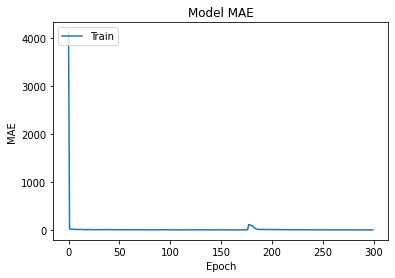

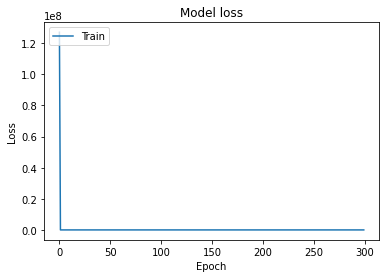

In [36]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

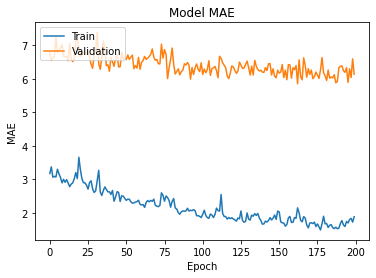

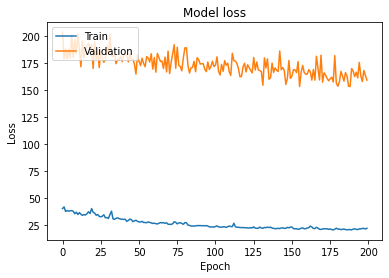

In [41]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()